# Data Visualization Assignment (Matplotlib & Seaborn)
Author: Katie Sylvia

Data set in the data folder as `auto_mpg_dataset.csv`. Dataset is of cars from the 1970s and 1980s.<br>
Data from: https://www.mldata.io/datasets-sort/regression/<br>

In [28]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [29]:
# Read in the data

autodf = pd.read_csv('data/auto_mpg_dataset.csv')
autodf

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


In [30]:
# Display the first 5 rows
autodf.head(5)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [31]:
# Summary statistics (using .describe())
autodf.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


## Data Cleaning

In [32]:
# Check the datatypes
autodf.info

<bound method DataFrame.info of      cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0  3504.0          12.0          70   
1            8         350.0       165.0  3693.0          11.5          70   
2            8         318.0       150.0  3436.0          11.0          70   
3            8         304.0       150.0  3433.0          12.0          70   
4            8         302.0       140.0  3449.0          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0  2790.0          15.6          82   
394          4          97.0        52.0  2130.0          24.6          82   
395          4         135.0        84.0  2295.0          11.6          82   
396          4         120.0        79.0  2625.0          18.6          82   
397          4         119.0        82.0  2720.0          19.4          82   

     origin                   c

In [42]:
# Check for null values

null_count = autodf.isnull().sum()
print('Number of null values:', null_count)


Number of null values: cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64


In [44]:
# Drop the non-numerical column
autodf_numeric = autodf.select_dtypes(include='number')

# Print the resulting DataFrame
print(autodf_numeric)


     cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0  3504.0          12.0          70   
1            8         350.0       165.0  3693.0          11.5          70   
2            8         318.0       150.0  3436.0          11.0          70   
3            8         304.0       150.0  3433.0          12.0          70   
4            8         302.0       140.0  3449.0          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0  2790.0          15.6          82   
394          4          97.0        52.0  2130.0          24.6          82   
395          4         135.0        84.0  2295.0          11.6          82   
396          4         120.0        79.0  2625.0          18.6          82   
397          4         119.0        82.0  2720.0          19.4          82   

     origin   mpg  
0         1  18.0  
1         1  15.0  
2  

## Correlations

In [34]:
# Get correlations for numeric data
corr = autodf.corr(numeric_only = True)
corr

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950721,0.084291,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.079333,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.084291,0.079333,1.000000,0.071114,-0.080685,-0.067952,0.035575,-0.073501
weight,0.896017,0.932824,0.071114,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.080685,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.348746,-0.370164,-0.067952,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,0.035575,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.073501,-0.831741,0.420289,0.579267,0.563450,1.000000


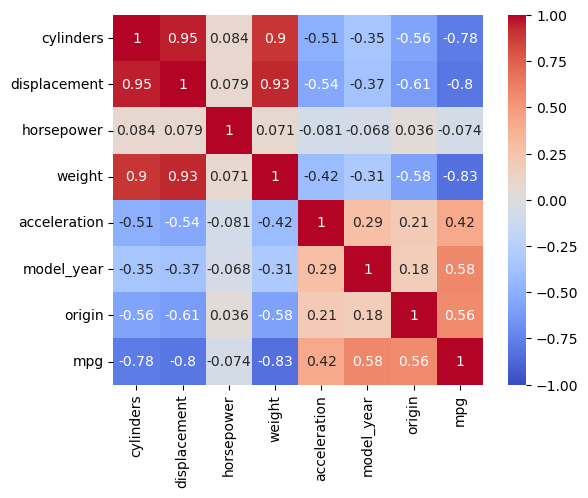

In [35]:
# Create a heatmap
sns.heatmap(corr,
    square = True,
    cmap = "coolwarm",
    annot = True,
    vmax = 1,
    vmin = -1);

In [36]:
# What if we ONLY wanted to look at how the features correlate with `mpg`?
autodf.corr(numeric_only = True)[["mpg"]]


,mpg
cylinders,-0.775396
displacement,-0.804203
horsepower,-0.073501
weight,-0.831741
acceleration,0.420289
model_year,0.579267
origin,0.563450
mpg,1.000000


For more Seaborn color palettes, click [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Countplots

**Distribution of Model Year**

<Axes: xlabel='model_year', ylabel='count'>

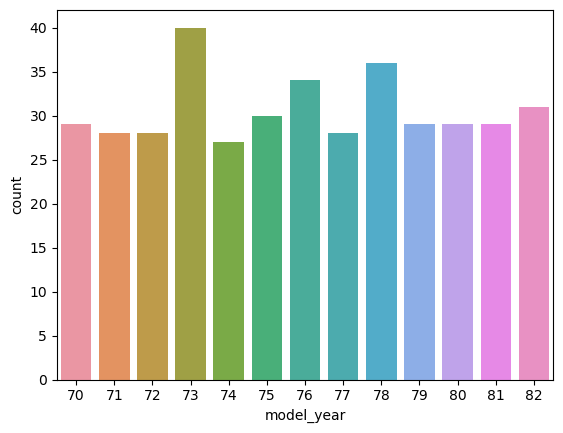

In [52]:
sns.countplot(x= 'model_year', data=autodf)



**Distribution of Origin**

<Axes: xlabel='model_year', ylabel='origin'>

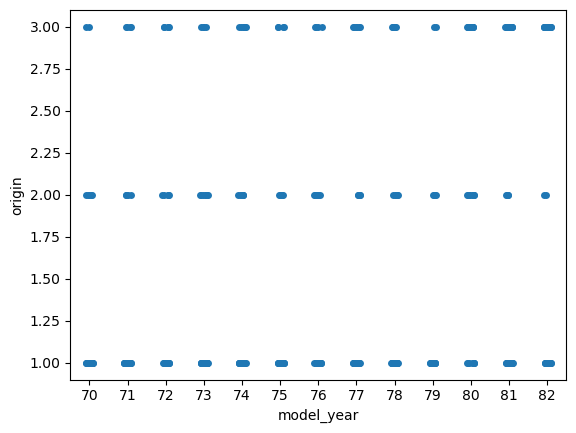

In [56]:
sns.stripplot(data = autodf, x= "model_year" , y = "origin")

**Distribution of Cylinders**

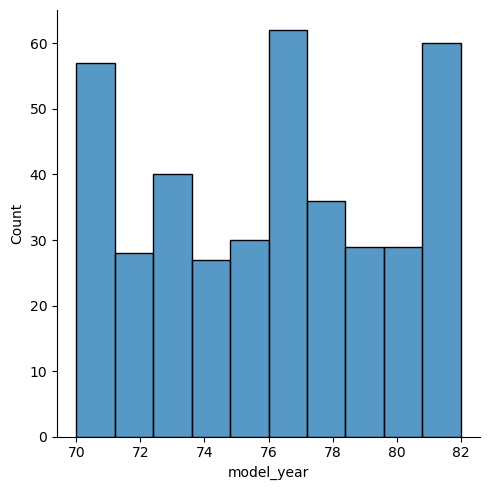

In [58]:
sns.displot(data = autodf, x = "model_year")

## Boxplots/Histograms

**MPG Distribution**

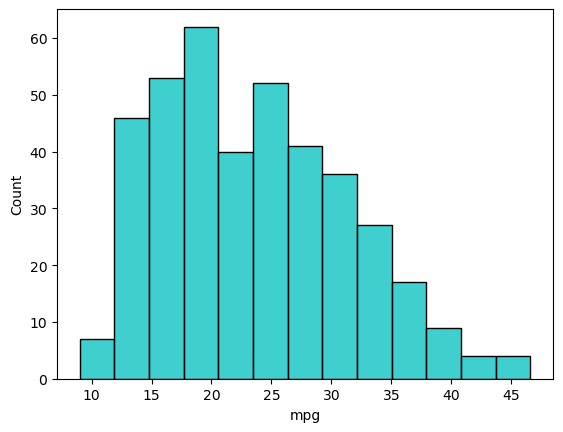

In [25]:
sns.histplot(autodf["mpg"], color = "c", bins = "auto");


**Weight Distribution**

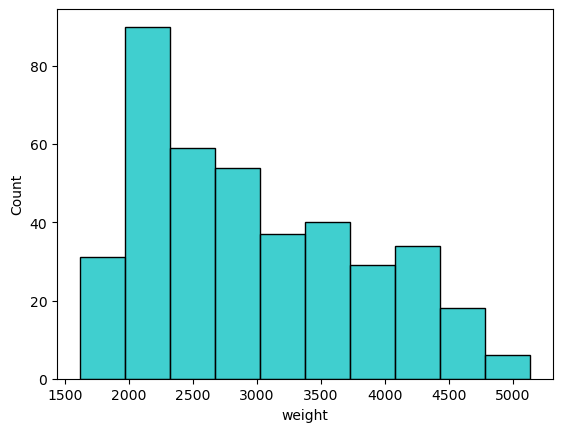

In [37]:
sns.histplot(autodf["weight"], color = "c", bins = "auto");


## Scatterplots

**Weight vs. MPG**

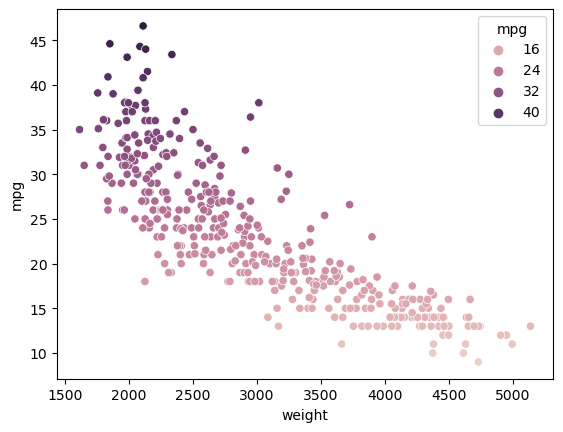

In [41]:
sns.scatterplot(x=autodf["weight"], y = autodf ["mpg"], hue = autodf["mpg"]);

## Your turn!

In [24]:
# Create more plot(s) of your choosing to help you explore the data!


/var/folders/x7/2ty286fs747289f1j5ywqzym0000gp/T/ipykernel_67010/3747221243.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=autodf, x="model_year", hue="mpg", fill=True, alpha=0.6, linewidth=1.5);
/var/folders/x7/2ty286fs747289f1j5ywqzym0000gp/T/ipykernel_67010/3747221243.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=autodf, x="model_year", hue="mpg", fill=True, alpha=0.6, linewidth=1.5);
/var/folders/x7/2ty286fs747289f1j5ywqzym0000gp/T/ipykernel_67010/3747221243.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=autodf, x="model_year", hue="mpg", fill=True, alpha=0.6, linewidth=1.5);
/var/folders/x7/2ty286fs747289f1j5ywqzym0000gp/T/ipykernel_67010/3747221243.py:1: UserWarning: Dataset has 0 variance; skipping de

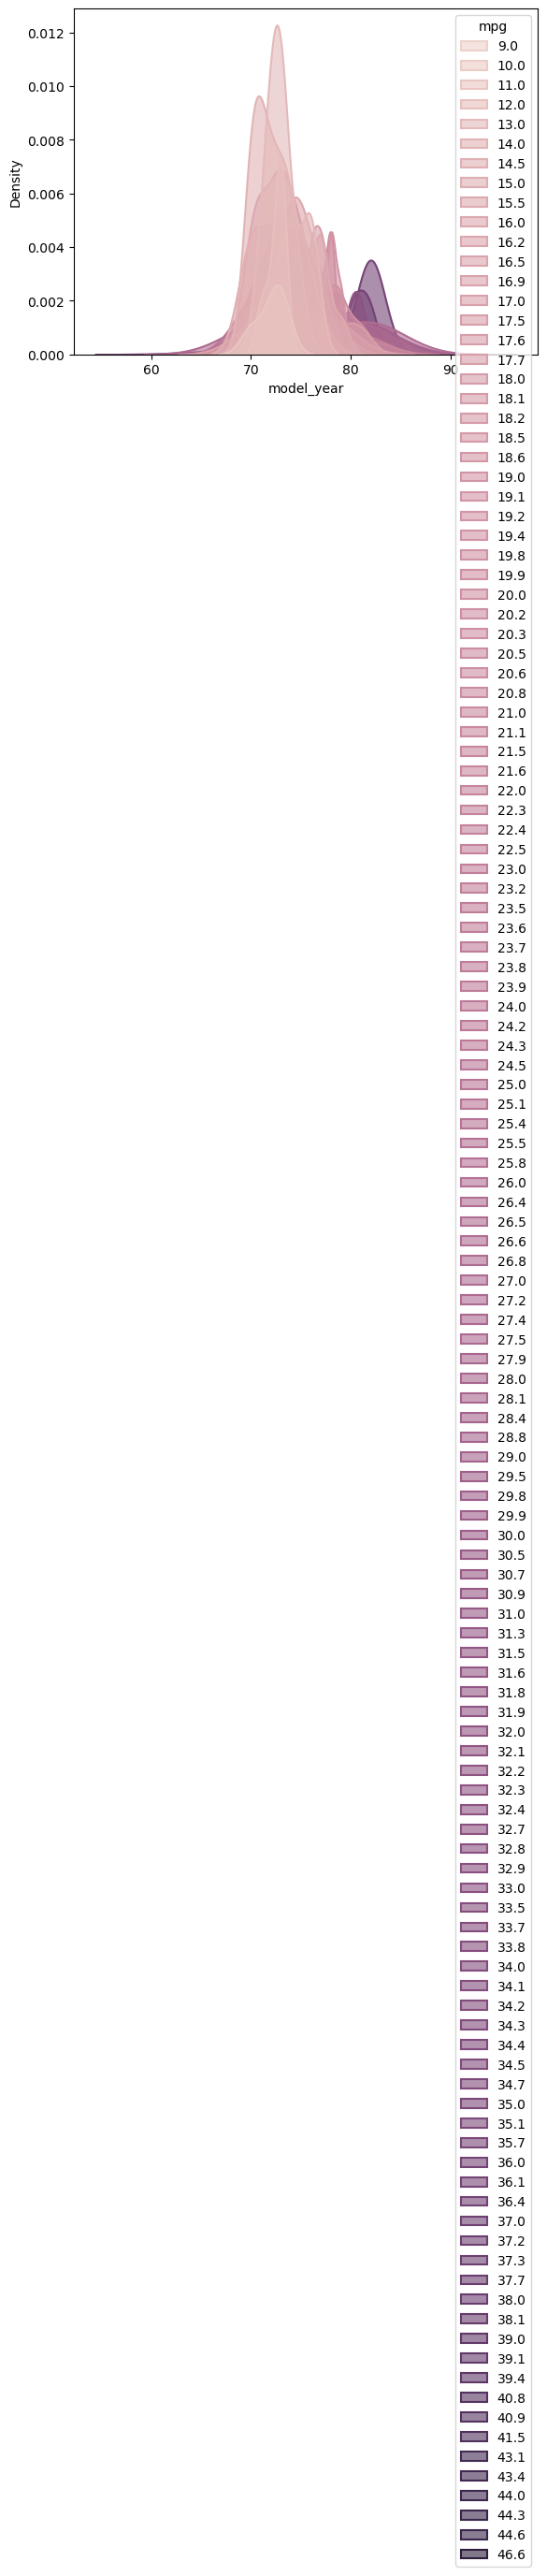

In [69]:
sns.kdeplot(data=autodf, x="model_year", hue="mpg", fill=True, alpha=0.6, linewidth=1.5);



